In [ ]:
# install the conda package for jieba per https://stackoverflow.com/questions/57887947/python-3-cannot-find-a-module
import sys
!conda install -c conda-forge jieba

In [5]:
# Set Up project and graphic parameters
#######################################

import os
import pandas as pd
import numpy as np
import matplotlib
import math
import random
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

sns.set_style(style="darkgrid")

#combine real and fake news to create a news_total dataframe
dfs_r = pd.read_csv('real_news.csv')
dfs_f = pd.read_csv('fake_news.csv')
dfs = pd.concat([dfs_r, dfs_f])

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped


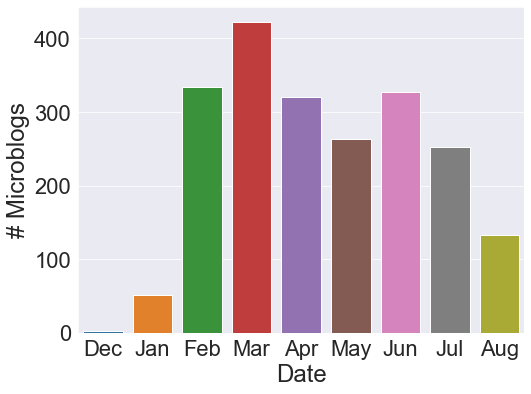

In [3]:
# Clean, read, and plot publication dates
#########################

publish_dates = dfs['date'].values
dates = np.array(publish_dates, dtype=str)
nums = np.zeros(publish_dates.shape, dtype=int)
for idx, date in enumerate(dates):
    dates[idx] = date[:7]
    time_array = time.strptime(date, "%Y-%m-%d %H:%M")
    # print(time_array)
    nums[idx] = int(time.mktime(time_array))
tem = list(zip(nums, dates))
tem = sorted(tem, key=lambda x: x[0], reverse=True)
num, dates = zip(*tem)

num = np.array(num, dtype=int)
dates = np.array(dates, dtype=str)

dates[ dates=='2019-12' ] = 'Dec'
dates[ dates=='2020-01' ] = 'Jan'
dates[ dates=='2020-02' ] = 'Feb'
dates[ dates=='2020-03' ] = 'Mar'
dates[ dates=='2020-04' ] = 'Apr'
dates[ dates=='2020-05' ] = 'May'
dates[ dates=='2020-06' ] = 'Jun'
dates[ dates=='2020-07' ] = 'Jul'
dates[ dates=='2020-08' ] = 'Aug'

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.figure(figsize=(8,6))
ax = sns.countplot(dates,order = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'])
plt.xlabel('Date')
plt.ylabel('# Microblogs')

plt.savefig("./Date_numOfMicroblog.pdf",bbox_inches='tight')
plt.show()

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
meta NOT subset; don't know how to subset; dropped


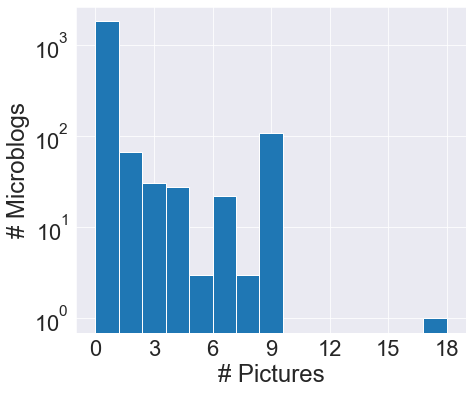

In [6]:
# Create a histogram of # of pictures
#########################################

hist_kws = {'alpha': 1}
pics = dfs['pic_url'].values
pics = np.array(pics, dtype=str)
nums = np.zeros(pics.shape, dtype=int)
for idx, pic in enumerate(pics):
    if pic == "[]":
        nums[idx] = 0
    else:
        pic_url = pic[1:-1].split(',')
        nums[idx] = len(pic_url)
        
plt.figure(figsize=(7,6))
ax = sns.distplot(nums,hist=True, kde=False, bins=15, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Pictures')
plt.ylabel('# Microblogs')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.xlim([nums.min()-1,nums.max()+1])
#plt.xticks(np.arange(nums.max()+1))
plt.xticks([0,3,6,9,12,15,18])
ax.set_yscale('log')
plt.savefig("./numOfPic_numOfWb.pdf",bbox_inches='tight')
plt.show()

The avrage is 215.88688212927758
The median is 154.0


meta NOT subset; don't know how to subset; dropped


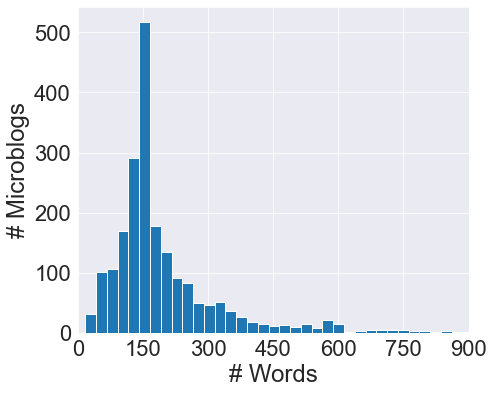

top 80% : 258
top 90% : 367
percent: 31.56%
percent: 43.96%


In [7]:
texts = dfs['text'].values
texts = np.array(texts, dtype=str)
text_nums = np.zeros(texts.shape, dtype=int)

for idx, t in enumerate(texts):
    text_nums[idx] = len(t)
    #print(text_nums[idx])

nums = text_nums
#AVRAGE
nsum=0
for i in range(len(nums)):
    nsum += nums[i]
    avrage = nsum / len(nums)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [nums[i] for i in range(len(nums))]
listnum.sort()
lnum = len(nums)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))
    
plt.figure(figsize=(7,6))
ax = sns.distplot(nums, bins=200, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Words')
plt.ylabel('# Microblogs')
plt.xlim([0, 900])
plt.xticks([0,150,300,450,600,750,900])
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("./numOfWords_numOfWb.pdf",bbox_inches='tight')
plt.show()

aaa=int(lnum*0.8)
ccc=140
ddd = 150
print('top 80% : '+ str(listnum[aaa]))

bbb=int(lnum*0.9)
print('top 90% : '+ str(listnum[bbb]))

listnum.index(ccc)/len(listnum)
print('percent: {:.2%}'.format(listnum.index(ccc)/len(listnum)))

listnum.index(ddd)/len(listnum)
print('percent: {:.2%}'.format(listnum.index(ddd)/len(listnum)))

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped


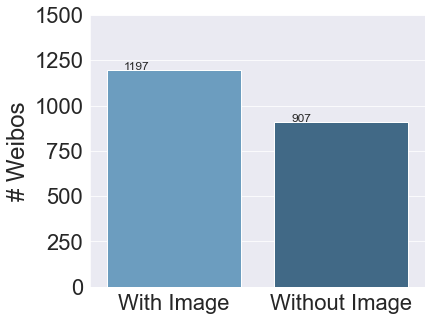

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped


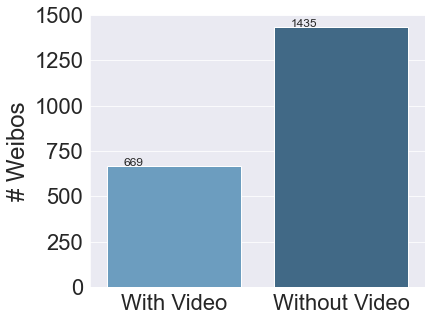

In [8]:
hist_kws = {'alpha': 1}
pics = dfs['pic_url'].values
pics = np.array(pics, dtype=str)
#print(pics)
#print(len(pics))
nopic = 0
wpic = 0
_img = []
for idx, pic in enumerate(pics):
    if pic == "[]":
        nopic = nopic+1
    else:
        wpic = wpic+1
_img = [wpic,nopic]


vis = dfs['video_url'].values
vis = np.array(vis, dtype=str)

nov = 0
wv = 0
for idx, v in enumerate(vis):
    if v == "nan":
        nov = nov+1
    else:
        wv = wv+1
_vis = [wv,nov]
plt.figure(figsize=(6,5))
x = ["With Image","Without Image"]
y = _img
ax = sns.barplot(x,y,palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
plt.ylabel('# Weibos')
plt.ylim([0,1500])
plt.savefig("./wb&img.pdf",bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,5))
x = ["With Video","Without Video"]
y = _vis
ax = sns.barplot(x,y,palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
plt.ylabel('# Weibos')
plt.ylim([0,1500])
#ax.set_yscale('log')
plt.savefig("./wb&video.pdf",bbox_inches='tight')
plt.show()

82 1886915


TTLibError: specify a font number between 0 and 1 (inclusive)

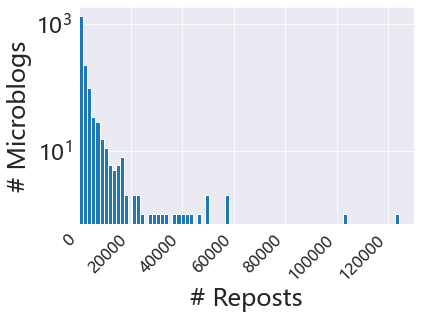

In [14]:
repost_num = []
hist_kws = {'alpha': 1}
#dfs = pd.read_csv('real_news.csv')
for r in dfs['repost_num']:
    repost_num.append(r)

#plt.figure(figsize=(7,6))
ax = sns.distplot(repost_num, bins=1200,hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
print(min(repost_num),max(repost_num))
plt.xlim([0,130000])
plt.xticks([0,20000,40000,60000,80000,100000,120000],rotation=45, horizontalalignment='right')
ax.set_yscale('log')

plt.savefig("./numOfRepost_numOfWB.pdf",bbox_inches='tight')
plt.show()

#AVRAGE
nsum=0
for i in range(len(repost_num)):
    nsum += repost_num[i]
    avrage = nsum / len(repost_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [repost_num[i] for i in range(len(repost_num))]
listnum.sort()
lnum = len(repost_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))


C:\Users\kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


636 1179103


TTLibError: specify a font number between 0 and 1 (inclusive)

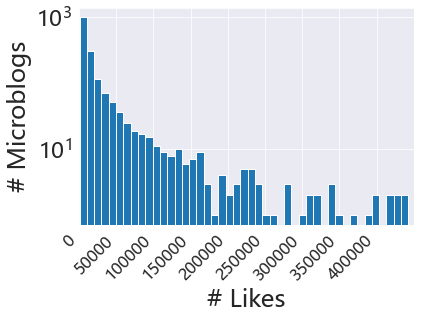

In [16]:
like_num = []
hist_kws = {'alpha': 1}
#dfs = pd.read_csv('real_news.csv')
for l in dfs['like_num']:
    like_num.append(l)

ax = sns.distplot(like_num, bins=120, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.xlim([0, 450000])
plt.xticks([0,50000,100000,150000,200000,250000,300000,350000,400000],rotation=45, horizontalalignment='right')
ax.set_yscale('log')
print(min(like_num),max(like_num))
plt.savefig("./numOfLike_numOfWB.pdf",bbox_inches='tight')
plt.show()

#AVRAGE
nsum=0
for i in range(len(like_num)):
    nsum += like_num[i]
    avrage = nsum / len(like_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [like_num[i] for i in range(len(like_num))]
listnum.sort()
lnum = len(like_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))



冠状病毒 257
新冠 1757
疫情 1533
疫区 3
传染 15
感染 311
确诊 2112
世界卫生组织 44
世卫 238
钟南山 144
张文宏 22
李文亮 66
福奇 19
口罩 311
试剂盒 3
疫苗 90
抗体 51
隔离 638
封城 9
防控 638
战疫 208
抗疫 486
援鄂 111
n95 11
coronavirus 3
covid 9
who 2
cdc 4
不存在的词: ['新冠肺炎', '死亡病例', '输入病例', '输入性传播', '核酸检测', '火神山', '雷神山', '群体免疫', '健康码', '健康宝', 'sars-cov-2']


C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


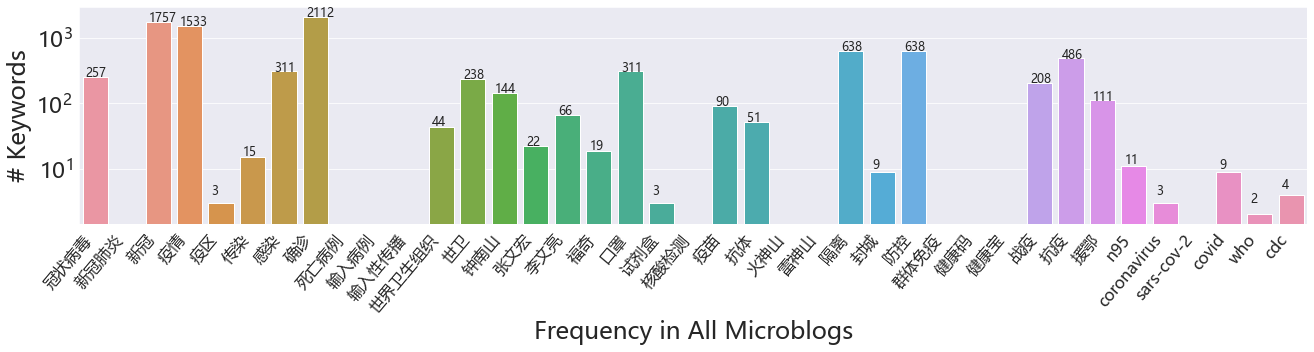

In [15]:
text = []
hist_kws = {'alpha': 1}
#dfs = pd.read_csv('real_news.csv')
for l in dfs['text']:
    text.append(l)
    
data_str="\n".join(text)
file=open('keywords.txt','w+', encoding='utf-8') 
file.write(str(data_str).lower()); 
file.close()

import jieba

txt = open("keywords.txt", encoding="utf-8").read()
def jiebafenci(txt,wordslist):
    jieba.load_userdict('keywords.txt')
    words  = jieba.lcut(txt) 
    counts = {}  
    for word in words:  
        counts[word] = counts.get(word,0) + 1
    x =[]
    y =[]
    lst=[]
    for i in range(len(wordslist)):
        try:
            x.append(wordslist[i])
            y.append(counts[wordslist[i]])
            print(wordslist[i],counts[wordslist[i]])
            
        except:
            lst.append(wordslist[i])
            y.append(0)
    print('不存在的词:',lst)
    #print(x)
    #print(y)
    key_t2 = ['冠状病毒\n(Coronavirus)','新冠肺炎\n(COVID-19)','新冠\n((Abbr.) COVID-19)','疫情\n(Pandemic/epidemic)','疫区\n(Pandemic/epidemic area)','传染\n(Infection)','感染\n(Infection)','确诊\n(Confirmed case)','死亡病例\n(Death case)','输入病例\n(Imported case)','输入性传播\n(Imported case)','世界卫生组织\n(WHO)','世卫\n((Abbr.) WHO)','钟南山\n(Nanshan Zhong)','张文宏\n(Wenhong Zhang)','李文亮\n(Wenliang Li)','福奇\n(Fauci)','口罩\n(Mask)','试剂盒\n(Testing kit)','核酸检测\n(Nucleic Acid Test)','疫苗\n(Vaccine)','抗体\n(Antibody)','火神山\n(Huoshenshan)','雷神山\n(Leishenshan)','隔离\n(Quarantine)','封城\n(Lockdown)','防控\n(Prevention and Control)','群体免疫\n(Herd (community) immunity)','健康码\n(Health code)','健康宝\n(Health code)','战疫\n(Combat COVID-19)','抗疫\n(Combat COVID-19)','援鄂\n(Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
    key_t = ['冠状病毒 (Coronavirus)','新冠肺炎 (COVID-19)','新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','疫区 (Pandemic/epidemic area)','传染 (Infection)','感染 (Infection)','确诊 (Confirmed case)','死亡病例 (Death case)','输入病例 (Imported case)','输入性传播 (Imported case)','世界卫生组织 (WHO)','世卫 ((Abbr.) WHO)','钟南山 (Nanshan Zhong)','张文宏 (Wenhong Zhang)','李文亮 (Wenliang Li)','福奇 (Fauci)','口罩 (Mask)','试剂盒 (Testing kit)','核酸检测 (Nucleic Acid Test)','疫苗 (Vaccine)','抗体 (Antibody)','火神山 (Huoshenshan)','雷神山 (Leishenshan)','隔离 (Quarantine)','封城 (Lockdown)','防控 (Prevention and Control)','群体免疫 (Herd (community) immunity)','健康码 (Health code)','健康宝 (Health code)','战疫 (Combat COVID-19)','抗疫 (Combat COVID-19)','援鄂 (Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
    plt.figure(figsize=(22,4))
    plt.rcParams["font.family"] = 'Microsoft YaHei'
    ax = sns.barplot(key,y)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
    plt.xticks(rotation=50, horizontalalignment='right')
    matplotlib.rcParams['pdf.fonttype'] = 3
    matplotlib.rcParams['ps.fonttype'] = 3
    ax.set_yscale('log')
    plt.rc('xtick', labelsize=16)
    plt.xlabel('Frequency in All Microblogs')
    plt.ylabel('# Keywords')
    plt.savefig('./FrequencyinAllMicroblogs_numOfKeywords.pdf', bbox_inches='tight')
    
    plt.show()
    
key = ['冠状病毒','新冠肺炎','新冠','疫情','疫区','传染','感染','确诊','死亡病例','输入病例','输入性传播','世界卫生组织','世卫','钟南山','张文宏','李文亮','福奇','口罩','试剂盒','核酸检测','疫苗','抗体','火神山','雷神山','隔离','封城','防控','群体免疫','健康码','健康宝','战疫','抗疫','援鄂','n95','coronavirus','sars-cov-2','covid','who','cdc']
            
if __name__=='__main__':
    txt = open("keywords.txt", encoding="utf-8").read()
    #need_words = open("keywords.txt", encoding="utf-8").read()
    #find = []
    #for i in need_words.split():
     #   find.append(i.lower())
    jiebafenci(txt,key)

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


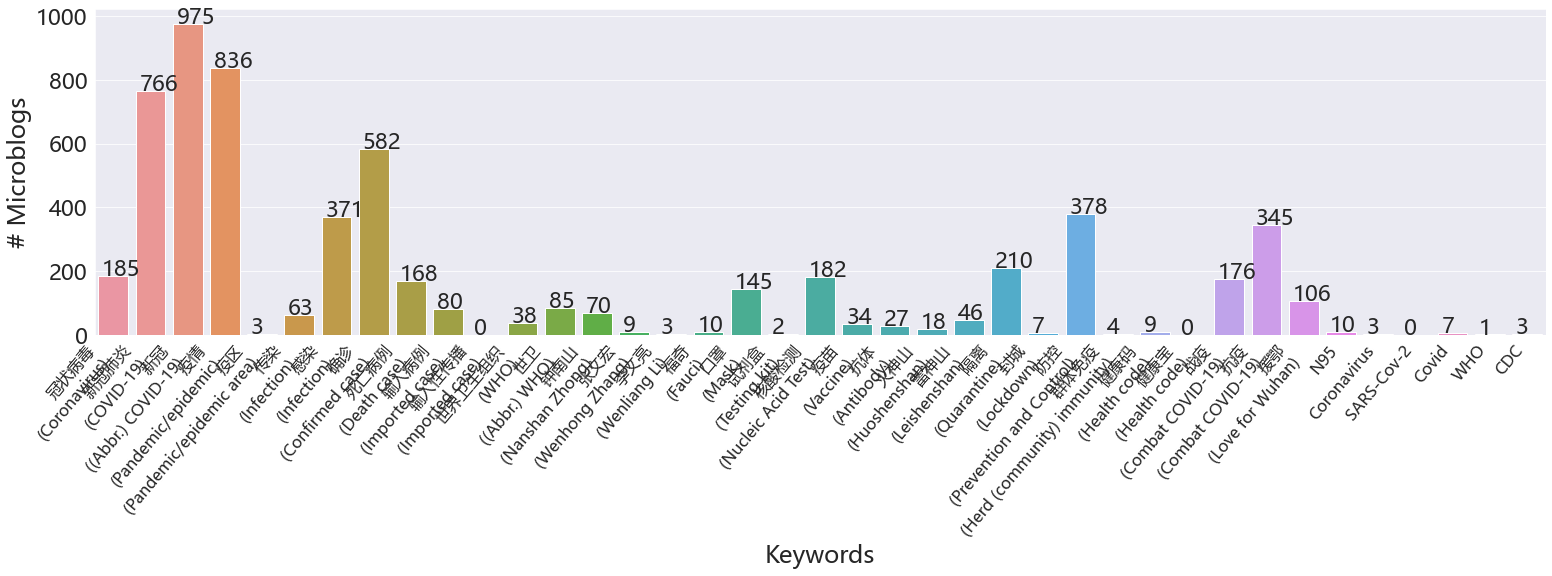

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


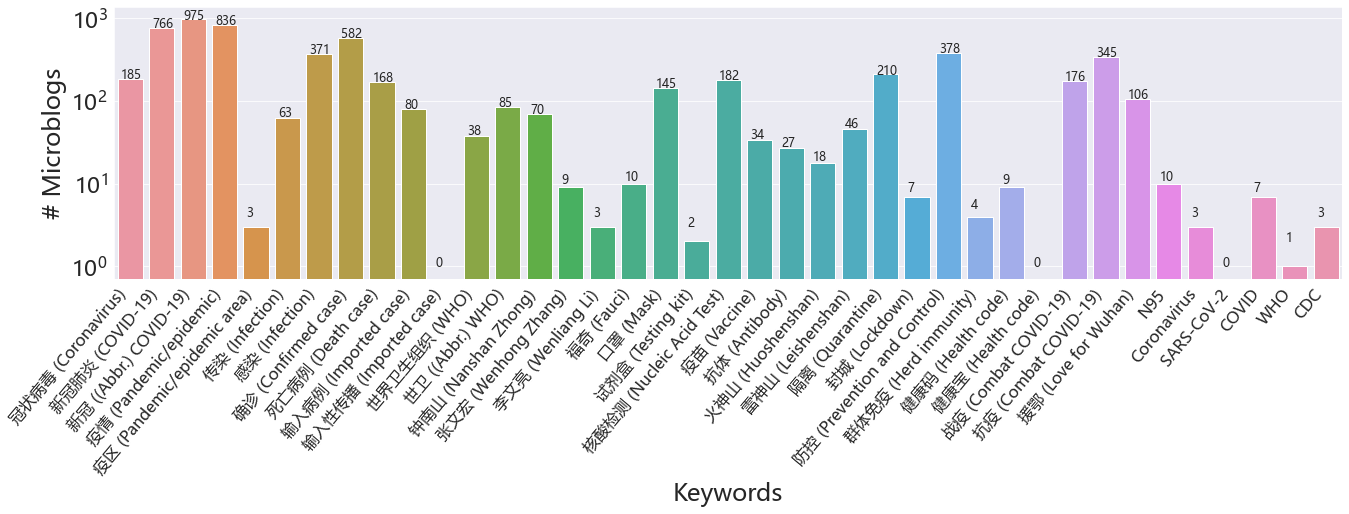

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


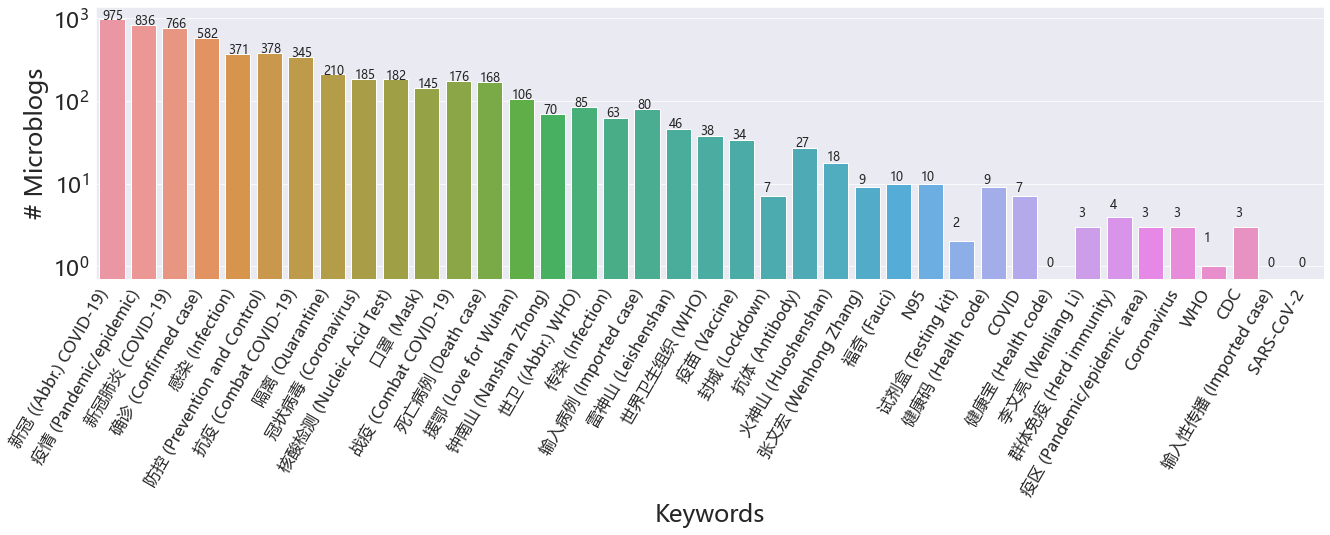

In [17]:
text = []
hist_kws = {'alpha': 1}
#dfs = pd.read_csv('real_news.csv')
for l in dfs['text']:
    text.append(l.lower())

num = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]    
key = ['冠状病毒','新冠肺炎','新冠','疫情','疫区','传染','感染','确诊','死亡病例','输入病例','输入性传播','世界卫生组织','世卫','钟南山','张文宏','李文亮','福奇','口罩','试剂盒','核酸检测','疫苗','抗体','火神山','雷神山','隔离','封城','防控','群体免疫','健康码','健康宝','战疫','抗疫','援鄂','n95','coronavirus','sars-cov-2','covid','who','cdc']
key_t2 = ['冠状病毒\n(Coronavirus)','新冠肺炎\n(COVID-19)','新冠\n((Abbr.) COVID-19)','疫情\n(Pandemic/epidemic)','疫区\n(Pandemic/epidemic area)','传染\n(Infection)','感染\n(Infection)','确诊\n(Confirmed case)','死亡病例\n(Death case)','输入病例\n(Imported case)','输入性传播\n(Imported case)','世界卫生组织\n(WHO)','世卫\n((Abbr.) WHO)','钟南山\n(Nanshan Zhong)','张文宏\n(Wenhong Zhang)','李文亮\n(Wenliang Li)','福奇\n(Fauci)','口罩\n(Mask)','试剂盒\n(Testing kit)','核酸检测\n(Nucleic Acid Test)','疫苗\n(Vaccine)','抗体\n(Antibody)','火神山\n(Huoshenshan)','雷神山\n(Leishenshan)','隔离\n(Quarantine)','封城\n(Lockdown)','防控\n(Prevention and Control)','群体免疫\n(Herd (community) immunity)','健康码\n(Health code)','健康宝\n(Health code)','战疫\n(Combat COVID-19)','抗疫\n(Combat COVID-19)','援鄂\n(Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
key_t = ['冠状病毒 (Coronavirus)','新冠肺炎 (COVID-19)','新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','疫区 (Pandemic/epidemic area)','传染 (Infection)','感染 (Infection)','确诊 (Confirmed case)','死亡病例 (Death case)','输入病例 (Imported case)','输入性传播 (Imported case)','世界卫生组织 (WHO)','世卫 ((Abbr.) WHO)','钟南山 (Nanshan Zhong)','张文宏 (Wenhong Zhang)','李文亮 (Wenliang Li)','福奇 (Fauci)','口罩 (Mask)','试剂盒 (Testing kit)','核酸检测 (Nucleic Acid Test)','疫苗 (Vaccine)','抗体 (Antibody)','火神山 (Huoshenshan)','雷神山 (Leishenshan)','隔离 (Quarantine)','封城 (Lockdown)','防控 (Prevention and Control)','群体免疫 (Herd immunity)','健康码 (Health code)','健康宝 (Health code)','战疫 (Combat COVID-19)','抗疫 (Combat COVID-19)','援鄂 (Love for Wuhan)','N95','Coronavirus','SARS-CoV-2','COVID','WHO','CDC']
for t in text:
    for k in key:
        if k in t:
            index = key.index(k)
            num[index] = num[index]+1

plt.figure(figsize=(26,6))
plt.rcParams["font.family"] = 'Microsoft YaHei'
ax = sns.barplot(key_t2,num)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
#plt.savefig('./Keywords_# Microblogs_2.pdf', bbox_inches='tight')
    
plt.show()

plt.figure(figsize=(22,5))
plt.rcParams["font.family"] = 'Microsoft YaHei'
ax = sns.barplot(key_t,num)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
ax.set_yscale('log')
plt.xticks(rotation=50, horizontalalignment='right')
plt.rc('xtick', labelsize=16)
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
#plt.savefig('./Keywords_numOfMicroblogs.pdf', bbox_inches='tight')
plt.show()


plt.figure(figsize=(22,5))
plt.rcParams["font.family"] = 'Microsoft YaHei'
ax = sns.barplot(key_t,num,order=['新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','新冠肺炎 (COVID-19)','确诊 (Confirmed case)','感染 (Infection)','防控 (Prevention and Control)','抗疫 (Combat COVID-19)','隔离 (Quarantine)','冠状病毒 (Coronavirus)','核酸检测 (Nucleic Acid Test)','口罩 (Mask)','战疫 (Combat COVID-19)','死亡病例 (Death case)','援鄂 (Love for Wuhan)','钟南山 (Nanshan Zhong)','世卫 ((Abbr.) WHO)','传染 (Infection)','输入病例 (Imported case)','雷神山 (Leishenshan)','世界卫生组织 (WHO)','疫苗 (Vaccine)','封城 (Lockdown)','抗体 (Antibody)','火神山 (Huoshenshan)','张文宏 (Wenhong Zhang)','福奇 (Fauci)','N95','试剂盒 (Testing kit)','健康码 (Health code)','COVID','健康宝 (Health code)','李文亮 (Wenliang Li)','群体免疫 (Herd immunity)','疫区 (Pandemic/epidemic area)','Coronavirus','WHO','CDC','输入性传播 (Imported case)','SARS-CoV-2'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
ax.set_yscale('log')
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3
plt.xticks(rotation=60, horizontalalignment='right')
plt.rc('xtick', labelsize=16)
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
plt.savefig('./Keywords_numOfMicroblogs_3(60).pdf', bbox_inches='tight')
plt.show()

In [19]:
import jieba
import jieba.analyse
import codecs
import re
from collections import Counter


class WordCounter(object):

    def count_from_file(self, file, top_limit=0):
        with codecs.open(file, 'r', encoding='utf-8') as f:
            content = f.read()
            content = re.sub(r'\s+', r' ', content)
            content = re.sub(r'\.+', r' ', content)
            return self.count_from_str(content, top_limit=top_limit)

    def count_from_str(self, content, top_limit=0):
        if top_limit <= 0:
            top_limit = 100
        tags = jieba.analyse.extract_tags(content, topK=100)

        words = jieba.cut(content)
        counter = Counter()
        for word in words:
            if word in tags:
                counter[word] += 1

        return counter.most_common(top_limit)

if __name__ == '__main__':
    counter = WordCounter()
    result = counter.count_from_file('keywords.txt', top_limit=200)
    for k, v in result:
        print(k, v)

病例 2909
确诊 2112
新冠 1757
肺炎 1570
疫情 1533
新增 1321
美国 1028
检测 884
累计 709
视频 704
死亡 668
中国 660
报告 656
防控 638
隔离 638
人民日报 629
24 627
核酸 607
输入 574
北京 551
病毒 529
工作 518
武汉 512
医院 507
境外 489
抗疫 486
微博 480
患者 466
时间 437
出院 436
截至 433
无症状 409
其中 408
感染者 408
全球 397
人员 390
国家 378
目前 374
密切接触 356
进行 350
阳性 346
医学观察 315
感染 311
口罩 311
人民 307
治疗 302
10 301
治愈 298
集中 289
14 288
湖北 288
组织 284
20 280
正在 277
症状 259
冠状病毒 257
18 247
新型 247
现有 243
新闻 241
15 239
世卫 238
30 231
11 228
12 228
17 225
发布会 222
健康 214
观察 210
疑似病例 209
22 208
战疫 208
重症 201
一线 197
19 197
13 196
直播 193
21 192
16 190
31 186
专家组 183
本地 173
23 170
航班 167
武汉市 166
2020 164
疾控中心 160
时至 149
25 148
钟南山 144
万例 140
网页 139
特朗普 135
乌鲁木齐市 132
医疗队 127
28 126
约翰斯 119
29 117
援鄂 111
例新冠 108


C:\Users\kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


66 73717


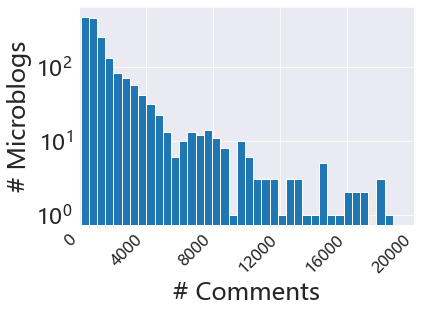

The avrage is 2122.28125
The median is 993.5


In [20]:
comment_num = []
hist_kws = {'alpha': 1}
dfs = pd.read_csv('real_news.csv')

for c in dfs['comment_num']:
    comment_num.append(c)

ax = sns.distplot(comment_num, bins=150, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
print(min(comment_num),max(comment_num))
plt.xlim([0,20000])
plt.xticks([0,4000,8000,12000,16000,20000],rotation=45, horizontalalignment='right')
ax.set_yscale('log')
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3
plt.savefig("./numOfComment_numOfWB.pdf",bbox_inches='tight')
plt.show()

#AVRAGE
nsum=0
for i in range(len(comment_num)):
    nsum += comment_num[i]
    avrage = nsum / len(comment_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [comment_num[i] for i in range(len(comment_num))]
listnum.sort()
lnum = len(comment_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))